In [1]:
import cv2
import matplotlib.pyplot as plt

In [72]:
image = cv2.imread("dataset.png")
image = cv2.resize(image,(720,640))

face_pbtxt="models/opencv_face_detector.pbtxt"
face_pb="models/opencv_face_detector_uint8.pb"
# face_pb="models/opencv_face_detector.pb"
age_model="models/age_net.caffemodel"
age_prototxt="models/age_deploy.prototxt"
gender_prototxt="models/gender_deploy.prototxt"
gender_model="models/gender_net.caffemodel"


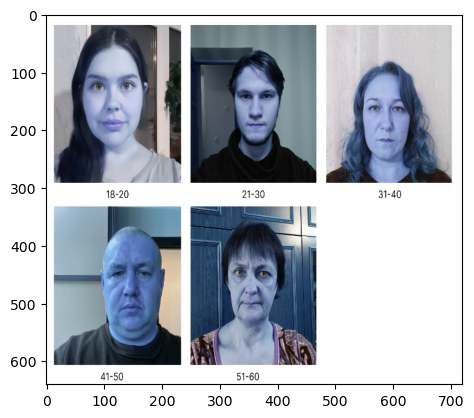

In [73]:
plt.imshow(image)

In [16]:
#Load Models
face=cv2.dnn.readNet(face_pb,face_pbtxt)
age=cv2.dnn.readNet(age_model,age_prototxt)
gender=cv2.dnn.readNet(gender_model,gender_prototxt)

In [17]:
dir(face)
face.getLayerNames()
face.getLayer(1).name
# face.getInputDetails()

'data_bn/FusedBatchNorm'

In [18]:
# Setup Classifications
age_classification=['(0-2)','(4-6)','(8-13)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']
gender_classification=['Male','Female']

In [97]:
#Image Copy
img_cp=image.copy()

img_height=img_cp.shape[0]
img_width=img_cp.shape[1]
print(img_height, img_width)
blob = cv2.dnn.blobFromImage(img_cp,1,(300,300),[104,117,123],True,False)


face.setInput(blob)
detected_faces=face.forward()
# print(f"Confidence: {detected_faces[0,0]}")

print("Blob shape:", blob.shape)
print("Detected faces shape:", detected_faces.shape)

640 720
Blob shape: (1, 3, 300, 300)
Detected faces shape: (1, 1, 200, 7)


In [75]:
detected_faces

array([[[[0.        , 1.        , 0.9991715 , ..., 0.5907068 ,
          0.26929548, 0.8740915 ],
         [0.        , 1.        , 0.99914896, ..., 0.16167404,
          0.8754855 , 0.3940372 ],
         [0.        , 1.        , 0.99724954, ..., 0.09382698,
          0.23064347, 0.35519543],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [76]:
face_bounds=[]
for i in range(detected_faces.shape[2]):
    confidence=detected_faces[0,0,i,2]
    if (confidence>0.9):
        print("Detected Faces: ",detected_faces[0,0,i],)
        x1=int(detected_faces[0,0,i,3]*img_width)
        y1=int(detected_faces[0,0,i,4]*img_height)
        x2=int(detected_faces[0,0,i,5]*img_width)
        y2=int(detected_faces[0,0,i,6]*img_height)
        # print([x1,y1,x2,y2])
        cv2.rectangle(img_cp,(x1,y1),(x2,y2),(0,0,255),2)
        print(f"Confidence: {confidence:.3f} | Face at: ({x1}, {y1}) to ({x2}, {y2})")
        face_bounds.append([x1,y1,x2,y2])

Detected Faces:  [0.         1.         0.9991715  0.14013126 0.5907068  0.26929548
 0.8740915 ]
Confidence: 0.999 | Face at: (100, 378) to (193, 559)
Detected Faces:  [0.         1.         0.99914896 0.7608494  0.16167404 0.8754855
 0.3940372 ]
Confidence: 0.999 | Face at: (547, 103) to (630, 252)
Detected Faces:  [0.         1.         0.99724954 0.08786498 0.09382698 0.23064347
 0.35519543]
Confidence: 0.997 | Face at: (63, 60) to (166, 227)
Detected Faces:  [0.         1.         0.9883454  0.4418732  0.6143816  0.55473495
 0.83480924]
Confidence: 0.988 | Face at: (318, 393) to (399, 534)
Detected Faces:  [0.         1.         0.90228766 0.45171922 0.14087358 0.55574125
 0.34535715]
Confidence: 0.902 | Face at: (325, 90) to (400, 221)


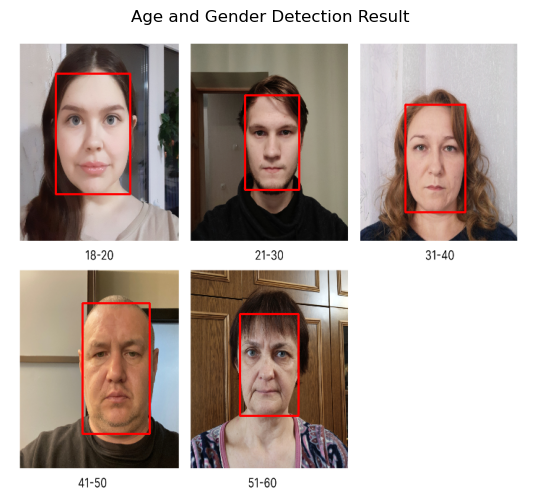

In [77]:
# while True: 
#     cv2.imshow("result",img_cp)
#     k = cv2.waitKey(1)
#     if k == ord('q'):
#         break

# cv2.destroyAllWindows()

image_rgb = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.title("Age and Gender Detection Result")
plt.show()

In [78]:
im_age = image.copy()

face_bounds:  [[100, 378, 193, 559], [547, 103, 630, 252], [63, 60, 166, 227], [318, 393, 399, 534], [325, 90, 400, 221]]


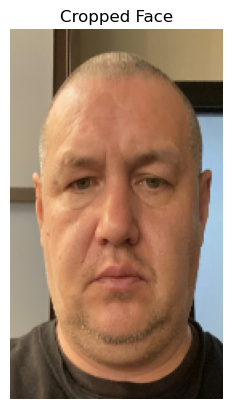

Gender : Male
AGE : (25-32)


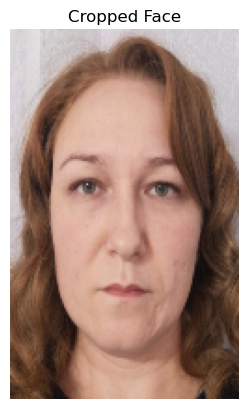

Gender : Female
AGE : (15-20)


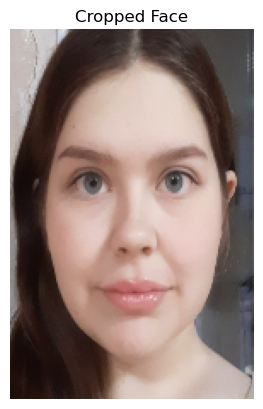

Gender : Female
AGE : (8-13)


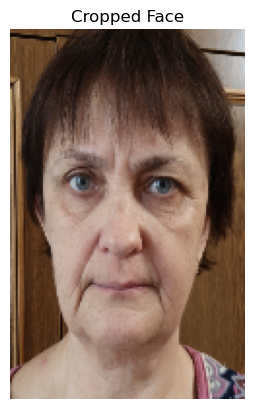

Gender : Male
AGE : (15-20)


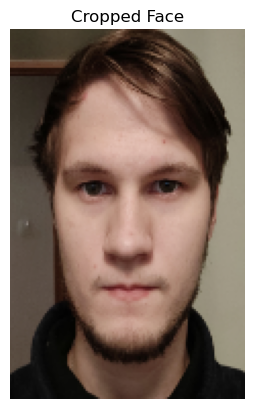

Gender : Male
AGE : (25-32)


In [98]:
print("face_bounds: ",face_bounds)

for face_bound in face_bounds:
    try:
        _face=im_age[max(0,face_bound[1]-25): min(face_bound[3]+25,img_cp.shape[0]-1),
                    max(0,face_bound[0]-20): min(face_bound[2]+20,img_cp.shape[1]-1)]
        

        _face_rgb = cv2.cvtColor(_face, cv2.COLOR_BGR2RGB)

        # Display using matplotlib
        plt.imshow(_face_rgb)
        plt.title("Cropped Face")
        plt.axis('off')
        plt.show()
    
        _blob= cv2.dnn.blobFromImage(_face, 1.0, (227,227),[78.4263377603, 87.7689143744, 114.895847746],)
        gender.setInput(_blob)
        predicted_gender=gender.forward()
        # print("predicted_gender",predicted_gender)
        _gender= gender_classification[predicted_gender[0].argmax()]
        print("Gender :",_gender)

        age.setInput(_blob)
        predicted_age=age.forward()
        # print("predicted_age",predicted_age)
        _age=age_classification[predicted_age[0].argmax()]
        print("AGE :",_age)

        cv2.putText(img_cp, f"{_gender}, {_age}", (face_bound[0], face_bound[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    except Exception as e:
        print(e)



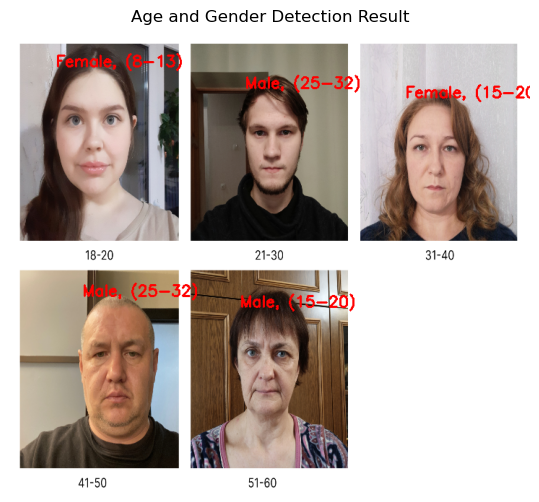

In [99]:
image_rgb = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.title("Age and Gender Detection Result")
plt.show()